## Convolutional Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image
# 이미지 로드해주는 라이브러리

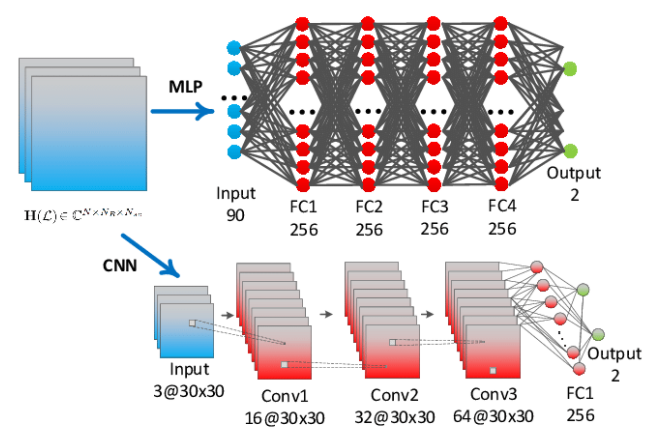

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/mlp_conv.png')

→ 이미지를 픽셀 단위로 학습했었는데, 흑백에서 컬러, 그리고 고차원이 될수록 학습이 어렵다. 더 좋은 방법이 없을까? ANN → CNN

* 특정 이미지를 잘 학습하는 Model 구조가 있지 않을까?

## < ImageNet Large Scale Visual Recognition Challenge (ILSVRC) > <br>
1,000개의 클래스로 구성되며 총 백만 개가 넘는 데이터를 포함한다. 약 120만 개는 학습(training)에 쓰고, 5만개는 검증(validation)에 쓴다.

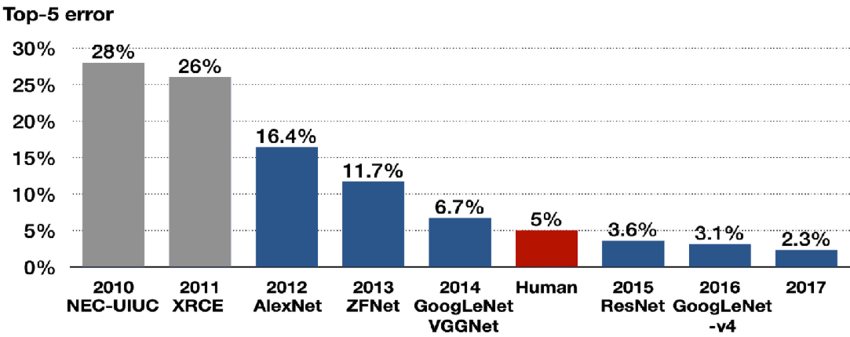

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/ic.png')

### VGGNet Architecture

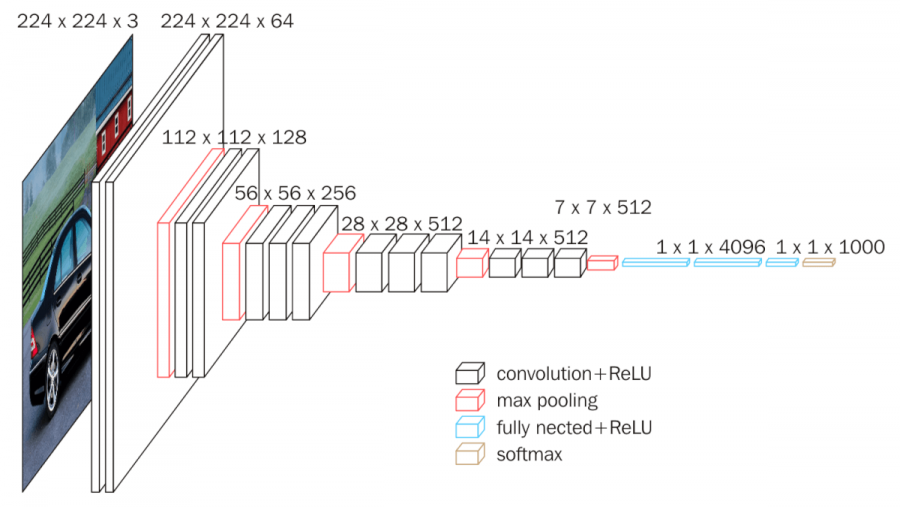

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/VGG16.png')

* BatchNorm : mini-batch의 평균값과 분산을 구하여 normalize 해준다. 
    - BN도 학습을 통해 구하는 Beta, Gamma 파라미터와 이동평균과 이동분산 총 4개의 파라미터를 가진다.(X channel수)

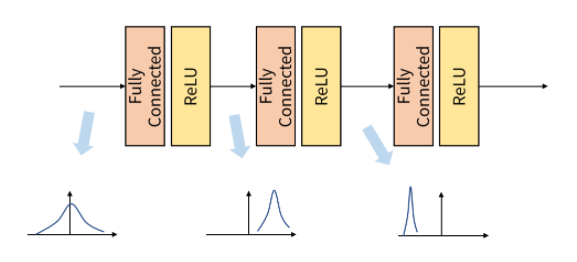

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/cosh.png')

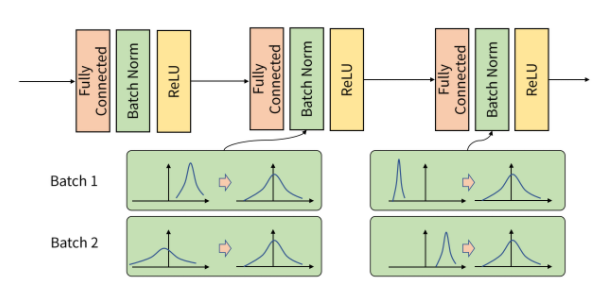

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/bn.png')

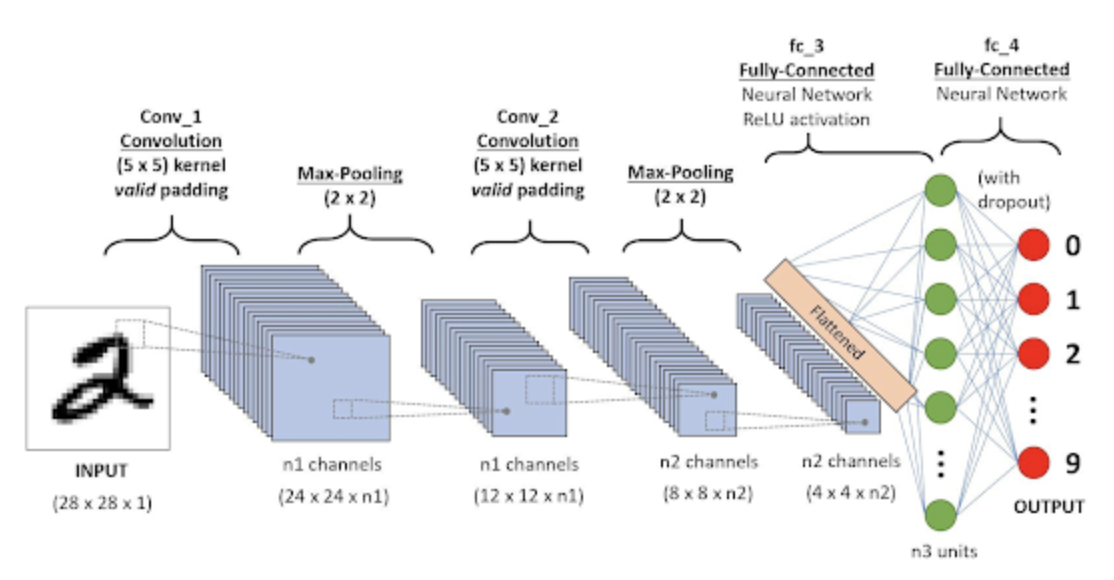

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/fcl.png')

→ 마지막에는 결국 label과 연결되어야 학습이 되기에, Fully Connected Layer를 필요로 한다.

* Global Average Pooling

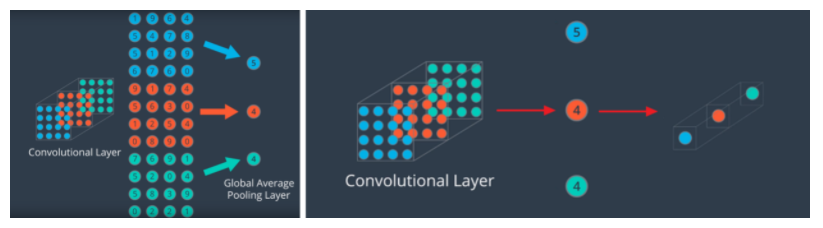

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/gap.png')

→ GAP를 사용하면 FCL없이 마지막 layer와 연결할 수 있다.(파라미터의 수를 줄이며, input 사이즈가 고정되지 않아도 된다.)

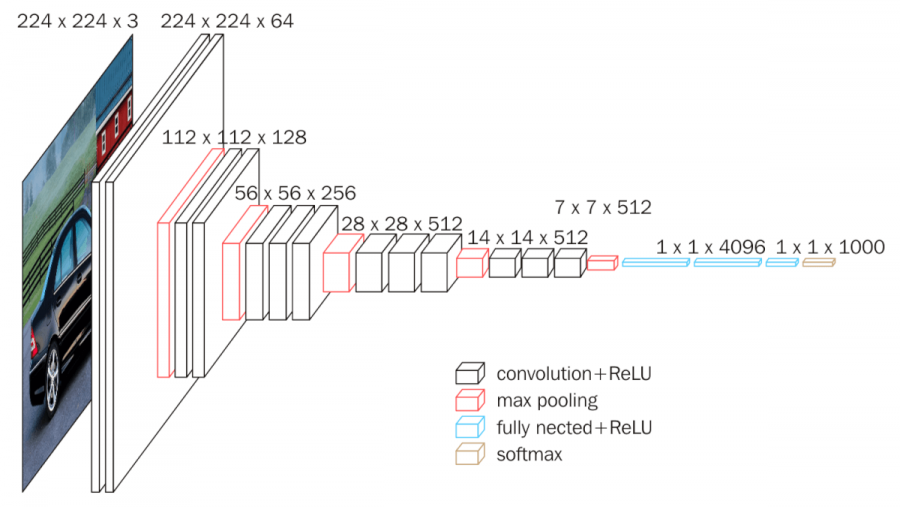

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/VGG16.png')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_vggnet(in_shape=(224, 224, 3), n_classes=10):
    input_tensor = Input(shape=in_shape)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), (2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), name='block5_pool')(x)




    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(units = 120, activation = 'relu')(x)
    x = Dropout(0.5)(x)

    # 마지막 softmax 층 적용. 
    output = Dense(units = n_classes, activation = 'softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

In [ ]:
3*3*3*64 + 64

1792

In [ ]:
3*3*64*64 + 64

36928

In [ ]:
3*3*64*128 + 128

73856

In [ ]:
model = create_vggnet(in_shape=(224, 224, 3), n_classes=10)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

* 함수로 구현

In [ ]:
512*120 + 120

61560

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model

 
def conv_block(tensor_in, filters, kernel_size, repeats=2, pool_strides=(2, 2), block_id=1):
    '''
    tensor_in: 입력 이미지 tensor 또는 입력 feature map tensor
    filters: conv 연산 filter개수
    kernel_size: conv 연산 kernel 크기
    repeats: conv 연산 적용 회수(Conv2D Layer 수)
    pool_strides:는 MaxPooling의 strides임. Conv 의 strides는 (1, 1)임. 
    '''
    x = tensor_in
    
    for i in range(repeats):
        # repeats 수만큼 conv층 반복
        conv_name = 'block'+str(block_id)+'_conv'+str(i+1) # Layer 이름 설정
        x = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same', name=conv_name)(x)

    x = MaxPooling2D((2, 2), strides=pool_strides, name='block'+str(block_id)+'_pool')(x)
    # max pooling 적용
    return x

In [ ]:
input_tensor = Input(shape=(224, 224, 3), name='test_input')
x = conv_block(tensor_in=input_tensor, filters=64, kernel_size=(3, 3), repeats=3, pool_strides=(2, 2), block_id=1)

conv_layers = Model(inputs=input_tensor, outputs=x)
conv_layers.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test_input (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_conv3 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_vggnet_by_block(in_shape=(224, 224,3), n_classes=10):
    input_tensor = Input(shape=in_shape, name='Input Tensor')

    x = conv_block(input_tensor, filters=64, kernel_size=(3, 3), repeats=2, pool_strides=(2, 2), block_id=1)
    # Conv연산 2번 반복
    x = conv_block(x, filters=128, kernel_size=(3, 3), repeats=2, pool_strides=(2, 2), block_id=2)
    # Conv연산 3번 반복
    x = conv_block(x, filters=256, kernel_size=(3, 3), repeats=3, pool_strides=(2, 2), block_id=3)
    # Conv연산 3번 반복
    x = conv_block(x, filters=512, kernel_size=(3, 3), repeats=3, pool_strides=(2, 2), block_id=4)
    # Conv 연산 3번 반복
    x = conv_block(x, filters=512, kernel_size=(3, 3), repeats=3, pool_strides=(2, 2), block_id=5)
    # Conv 연산 3번 반복

    
    x = GlobalAveragePooling2D()(x)
    # GlobalAveragePooling으로 Flatten적용.
    x = Dropout(0.5)(x)
    x = Dense(units = 120, activation = 'relu')(x)
    x = Dropout(0.5)(x)

    output = Dense(units = n_classes, activation = 'softmax')(x)
    # 마지막 softmax 층 적용. 
    model = Model(inputs=input_tensor, outputs=output, name='vgg_by_block')
    model.summary()
    # 모델 생성
    
    return model

In [ ]:
3*3*3*64 + 64

1792

In [ ]:
3*3*64*64 + 64

36928

In [ ]:
3*3*64*128 + 128

73856

In [ ]:
vgg_model = create_vggnet_by_block(in_shape=(128, 128, 3), n_classes=10)

Model: "vgg_by_block"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Tensor (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)      

→ 이후 학습은 이전에 했던 것과 동일하게 진행. 이번 실습에서는 모델 구축만 진행.